In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('./heart_Disease_prediction_new_final_CORRECTED.csv')

In [2]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
0,43,0,1,100,223,0,0,142,0,0.0,1,0
1,35,0,1,120,160,0,1,185,0,0.0,1,0
2,62,0,1,160,193,0,0,116,0,0.0,1,0
3,47,1,1,110,249,0,0,150,0,0.0,1,0
4,30,0,1,170,237,0,1,170,0,0.0,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3082 entries, 0 to 3081
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       3082 non-null   int64  
 1   sex       3082 non-null   int64  
 2   cp        3082 non-null   int64  
 3   trestbps  3082 non-null   int64  
 4   chol      3082 non-null   int64  
 5   fbs       3082 non-null   int64  
 6   restecg   3082 non-null   int64  
 7   thalach   3082 non-null   int64  
 8   exang     3082 non-null   int64  
 9   oldpeak   3082 non-null   float64
 10  slope     3082 non-null   int64  
 11  target    3082 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 289.1 KB


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
count,3082.000000,3082.000000,3082.000000,3082.000000,3082.000000,3082.000000,3082.000000,3082.000000,3082.000000,3082.000000,3082.000000,3082.000000
mean,54.138222,0.724854,2.749189,132.020117,228.672615,0.174238,0.671966,144.583387,0.384491,1.723491,1.893576,0.538936
std,9.196247,0.446660,1.152326,18.090120,82.549042,0.379375,0.787223,24.918348,0.486554,4.066366,0.699398,0.498563
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,1.000000,0.000000
25%,47.000000,0.000000,2.000000,120.000000,203.000000,0.000000,0.000000,126.000000,0.000000,0.000000,1.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,235.000000,0.000000,0.000000,147.000000,0.000000,0.800000,2.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,274.000000,0.000000,1.000000,163.000000,1.000000,1.900000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,62.000000,3.000000,1.000000


In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
target      0
dtype: int64

In [6]:
df['target'].value_counts()

target
1    1661
0    1421
Name: count, dtype: int64

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

<BarContainer object of 2 artists>

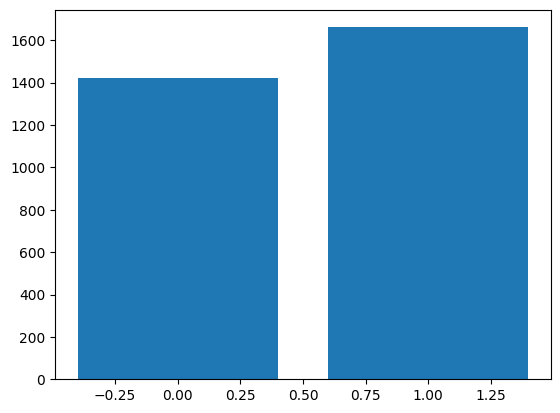

In [8]:
plt.bar(df['target'].value_counts().index, df['target'].value_counts())

<Axes: >

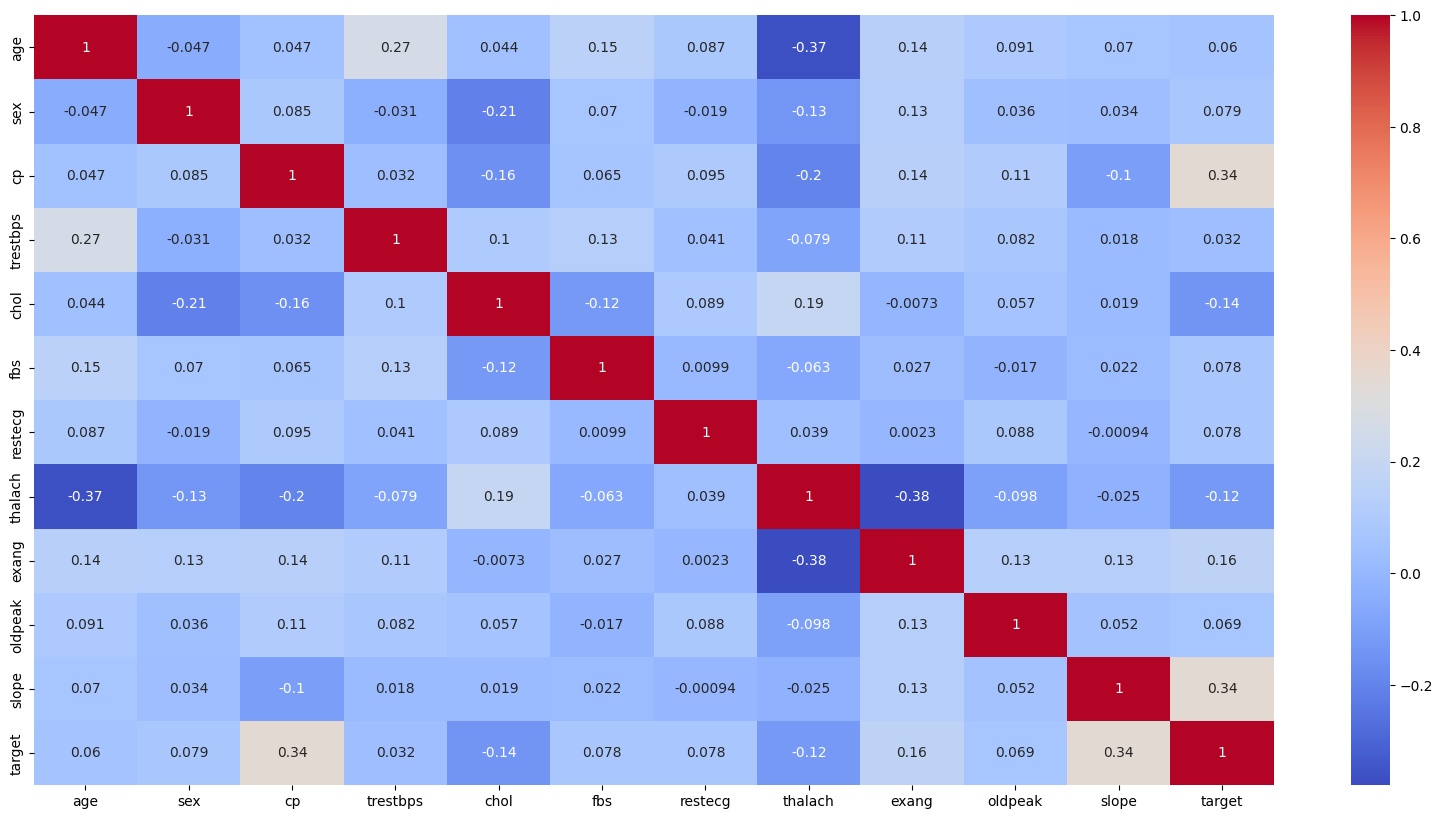

In [9]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [10]:
# making heart disease prediction model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

In [11]:
# split data into features and target
X = df.drop(columns=['target'])
Y = df['target']

# split data into train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
# model training
# logistic regression
logi_model = LogisticRegression()
logi_model.fit(X_train, Y_train)
logi_pred = logi_model.predict(X_test)
logi_acc = accuracy_score(Y_test, logi_pred)
print("Logistic Regression Accuracy: ", logi_acc)

Logistic Regression Accuracy:  0.713128038897893


In [14]:
#model training
# decision tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, Y_train)
dt_pred = dt_model.predict(X_test)
dt_acc = accuracy_score(Y_test, dt_pred)
print("Decision Tree Accuracy: ", dt_acc)

Decision Tree Accuracy:  0.940032414910859


In [15]:
#model training
# random forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, Y_train)
rf_pred = rf_model.predict(X_test)
rf_acc = accuracy_score(Y_test, rf_pred)
print("Random Forest Accuracy: ", rf_acc)

Random Forest Accuracy:  0.9497568881685575


In [16]:
model = VotingClassifier(estimators=[('lr', logi_model), ('dt', dt_model), ('rf', rf_model)], voting='hard')
model.fit(X_train, Y_train)
model_pred = model.predict(X_test)
model_acc = accuracy_score(Y_test, model_pred)
print("Combined Accuracy: ", model_acc)

Combined Accuracy:  0.9448946515397083


In [17]:
def plot_confusion_matrix(model_name, y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

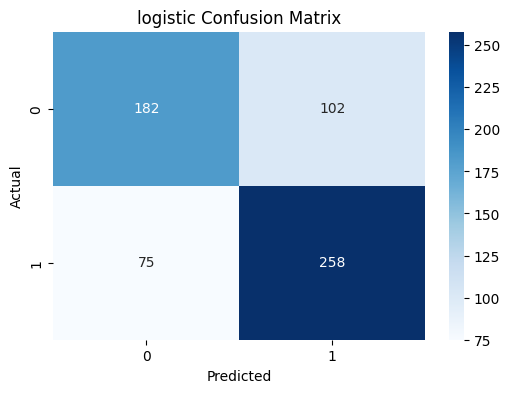

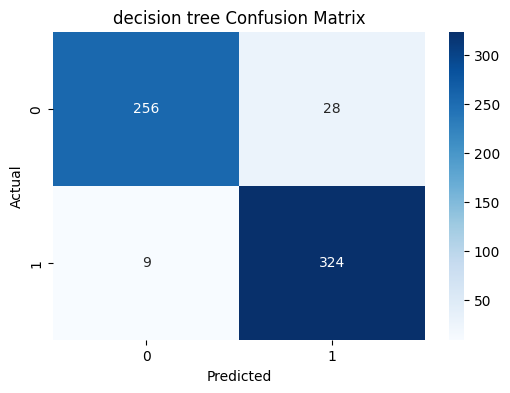

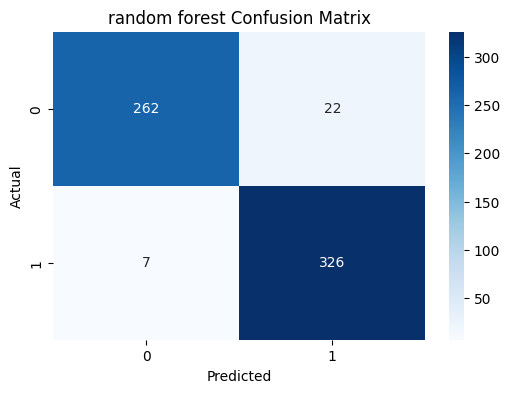

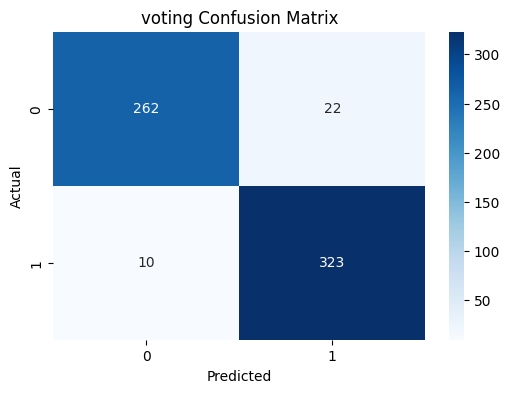

In [18]:
classifiers = {'logistic':logi_model, 'decision tree':dt_model, 'random forest':rf_model, 'voting':model}
for key, classifier in classifiers.items():
    classifier.fit(X_train, Y_train)
    y_pred = classifier.predict(X_test)
    plot_confusion_matrix(key, Y_test, y_pred)

In [19]:
# saving all models
import pickle
# pickle.dump(logi_model, open('../static/model/logi_model.pkl', 'wb'))
# pickle.dump(dt_model, open('../static/model/dt_model.pkl', 'wb'))
# pickle.dump(rf_model, open('../static/model/rf_model.pkl', 'wb'))
# pickle.dump(model, open('../static/model/model.pkl', 'wb'))
# pickle.dump(scaler, open('../static/model/scaler.pkl', 'wb'))

In [20]:
# using saved model
data = scaler.transform([[43,0,1,100,223,0,0,142,0,0,1]])
combinemodel = pickle.load(open('../static/model/model.pkl', 'rb'))
print(combinemodel.predict(data))

logistic_model = pickle.load(open('../static/model/logi_model.pkl', 'rb'))
print(logistic_model.predict(data))

decision_model = pickle.load(open('../static/model/dt_model.pkl', 'rb'))
print(decision_model.predict(data))

random_model = pickle.load(open('../static/model/rf_model.pkl', 'rb'))
print(random_model.predict(data))


d:\Abhyas\SEM_6\projects\Heart_Disease_Prediction\AIML Project\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


[0]
[0]
[0]
[0]


In [21]:
print(random_model.predict(data))
random_model.predict_proba(data)

[0]


array([[0.92, 0.08]])